# ***Alignment***

In [18]:
from retinaface import RetinaFace
import matplotlib.pyplot as plt 
import math
import numpy as np 
import cv2
from PIL import Image 

In [16]:
img_path = './data/img5.jpg'
img = cv2.imread(img_path)

In [7]:
resp = RetinaFace.detect_faces(img_path)
resp

{'face_1': {'score': np.float64(0.9995560050010681),
  'facial_area': [np.int64(185), np.int64(210), np.int64(311), np.int64(361)],
  'landmarks': {'right_eye': [np.float32(224.82886), np.float32(264.22818)],
   'left_eye': [np.float32(277.84174), np.float32(283.02057)],
   'nose': [np.float32(240.17683), np.float32(295.36496)],
   'mouth_right': [np.float32(207.47176), np.float32(310.5832)],
   'mouth_left': [np.float32(257.05087), np.float32(327.09647)]}}}

In [10]:
x1,y1 = resp['face_1']['landmarks']['right_eye']
x2,y2 = resp['face_1']['landmarks']['left_eye']

a = abs(y1-y2)
b = abs(x1-x2)
c = math.sqrt(a*a + b*b)

a,b,c

(np.float32(18.792389), np.float32(53.01288), 56.2451690633849)

In [11]:
cos_alpha = (b*b + c*c - a*a) / (2*b*c)
cos_alpha 

np.float32(0.94253206)

In [ ]:
alpha = np.arccos(cos_alpha) # radius 
alpha = (alpha*180) / math.pi 
alpha

np.float32(19.518772)

In [23]:
aligned_img = Image.fromarray(img)
aligned_img = np.array(aligned_img.rotate(alpha))

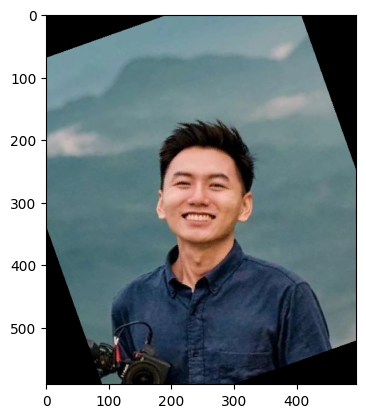

In [26]:
plt.imshow(aligned_img[:,:,::-1])